<a href="https://colab.research.google.com/github/LegateG/LegateG/blob/main/CIFC_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Install modules
!pip install polars

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Import the necessary libraries
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
fire = pl.read_csv("/content/drive/MyDrive/Project/Wildfires in Canada - Predictive Analysis/CIFFC/DailyCSV/0718.csv")
fire.tail(10)

field_agency_fire_id,field_agency_code,field_agency_data_timezone,field_situation_report_date,field_status_date,field_stage_of_control_status,field_system_fire_cause,field_response_type,field_fire_size,field_latitude,field_longitude,full_count
str,str,str,str,str,str,str,str,f64,f64,f64,i64
"""04-003-2023""","""ns""","""ADT""","""2023-04-01T06:00:00.000Z""","""2023-04-05T06:00:00.000Z""","""OUT""","""N""","""FUL""",2.68,43.740776,-65.826851,4248
"""01-001-2023""","""ns""","""ADT""","""2023-04-04T06:00:00.000Z""","""2023-04-04T06:00:00.000Z""","""OUT""","""N""","""FUL""",0.02,44.491333,-64.310127,4248
"""HWF-002-2023""","""ab""","""MDT""","""2023-03-30T20:05:00.000Z""","""2023-03-30T14:05:00.000Z""","""UC""","""H""","""FUL""",0.1,58.522083,-115.166883,4248
"""09-001-2023""","""ns""","""ADT""","""2023-03-22T23:00:00.000Z""","""2023-03-24T00:00:00.000Z""","""OUT""","""N""","""FUL""",57.32,45.015392,-63.214252,4248
"""04-001-2023""","""ns""","""ADT""","""2023-03-22T21:00:00.000Z""","""2023-03-23T02:00:00.000Z""","""OUT""","""N""","""FUL""",13.39,43.807041,-65.868652,4248
"""09-002-2023""","""ns""","""ADT""","""2023-03-22T21:00:00.000Z""","""2023-03-23T00:00:00.000Z""","""OUT""","""N""","""FUL""",0.14,44.78252,-63.103661,4248
"""04-002-2023""","""ns""","""ADT""","""2023-03-22T07:00:00.000Z""","""2023-03-23T00:00:00.000Z""","""OUT""","""N""","""FUL""",0.88,43.866386,-66.060425,4248
"""2023PP1""","""pc""","""EST""","""2023-02-25T16:40:11.000Z""","""2023-02-25T05:00:00.000Z""","""OUT""","""H""","""FUL""",0.0,41.9352,-82.5175,4248
"""559""","""qc""","""EDT""","""2003-07-01T20:30:00.000Z""","""2003-07-01T20:30:00.000Z""","""OC""","""N""","""MON""",5835.5,54.6678,-73.1356,4248


In [ ]:
### Find the size of the `fire` dataframe.
fire.shape

(4248, 12)

In [ ]:
### Display the data types of all the variables in the data set.
fire.dtypes

[String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Int64]

In [ ]:
bbn

In [ ]:
### Data cleaning & prep: Drop the last column and rename all of them
fire = fire.drop("field_agency_fire_id","field_agency_data_timezone","field_status_date","full_count")


In [ ]:
#"field_agency_fire_id": "id",
#"field_agency_data_timezone": "tz",
#"field_status_date": "status_date",
fire = fire.rename({
    "field_agency_code": "agency_loc",
    "field_situation_report_date": "rep_date",
    "field_stage_of_control_status": "stage",
    "field_system_fire_cause": "cause",
    "field_response_type": "response",
    "field_fire_size": "size",
    "field_latitude": "lat",
    "field_longitude": "lon"
})

In [ ]:
available_columns = fire.columns
print(available_columns)

['agency_loc', 'rep_date', 'stage', 'cause', 'response', 'size', 'lat', 'lon']


In [ ]:
### Data cleaning & prep: Adjust the data types
fire = fire.with_columns([
    pl.col("rep_date").cast(pl.Datetime)
])
fire.tail(10)

agency_loc,rep_date,stage,cause,response,size,lat,lon
str,datetime[μs],str,str,str,f64,f64,f64
"""ns""",2023-04-01 06:00:00,"""OUT""","""N""","""FUL""",2.68,43.740776,-65.826851
"""ns""",2023-04-04 06:00:00,"""OUT""","""N""","""FUL""",0.02,44.491333,-64.310127
"""ab""",2023-03-30 20:05:00,"""UC""","""H""","""FUL""",0.1,58.522083,-115.166883
"""ns""",2023-03-22 23:00:00,"""OUT""","""N""","""FUL""",57.32,45.015392,-63.214252
"""ns""",2023-03-22 21:00:00,"""OUT""","""N""","""FUL""",13.39,43.807041,-65.868652
"""ns""",2023-03-22 21:00:00,"""OUT""","""N""","""FUL""",0.14,44.78252,-63.103661
"""ns""",2023-03-22 07:00:00,"""OUT""","""N""","""FUL""",0.88,43.866386,-66.060425
"""pc""",2023-02-25 16:40:11,"""OUT""","""H""","""FUL""",0.0,41.9352,-82.5175
"""qc""",2003-07-01 20:30:00,"""OC""","""N""","""MON""",5835.5,54.6678,-73.1356


In [ ]:
### Are there any missing values in the `fire` dataframe?
fire.null_count()

agency_loc,rep_date,stage,cause,response,size,lat,lon
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


In [ ]:
### Find the summary statistics for all variables except for 'ctrl_stage' (outcome) variable.
fire.select([
    pl.all().exclude("ctrl_stage")
]).describe()

describe,agency_loc,rep_date,stage,cause,response,size,lat,lon
str,str,str,str,str,str,f64,f64,f64
"""count""","""4248""","""4248""","""4248""","""4248""","""4248""",4248.0,4248.0,4248.0
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",null,null,null,null,null,2581.705367,52.347462,-101.045909
"""std""",null,null,null,null,null,26167.715472,4.398144,22.407527
"""min""","""ab""","""2000-01-01 05:…","""BH""","""H""","""FUL""",-0.1,41.9352,-140.68977
"""25%""",null,null,null,null,null,0.05,49.196417,-120.145367
"""50%""",null,null,null,null,null,0.3,52.392,-110.730933
"""75%""",null,null,null,null,null,7.0,55.241689,-77.6772
"""max""","""yt""","""2023-07-19 02:…","""UC""","""U""","""MON""",1041760.4,69.571633,-52.7772


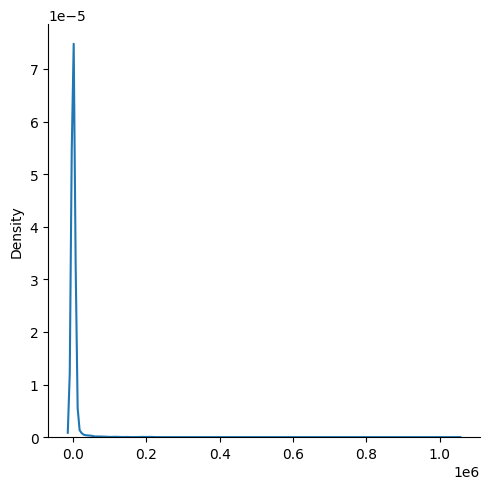

In [ ]:
### Plot the distribution plot for the variable `'size'`.
sns.displot(fire['size'], kind='kde')

In [ ]:
## Using NumPy's one_hot function
cat_cols = ['agency_loc', 'stage', 'cause','response']
for col in cat_cols:
    category_data = fire[col].to_numpy()
    category_unique = np.unique(category_data)
    encoded_categories = pl.Series(np.eye(len(category_unique), dtype=np.uint8))

    def encode_onehot_udf(series):
        return encoded_categories.iloc[np.searchsorted(category_unique, series)]

    fire = fire.select(pl.all(), pl.col(col).apply(encode_onehot_udf, name=f"{col}_encoded"))
print(encoded_onehot_df)

<ipython-input-23-58f0f30a1f2d>:11: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  fire = fire.select(pl.all(), pl.col(col).apply(encode_onehot_udf, name=f"{col}_encoded"))


TypeError: Expr.apply() got an unexpected keyword argument 'name'

In [ ]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_columns = X.columns[categorical_feature_mask].tolist()

NameError: name 'X' is not defined

In [ ]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False )
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

NameError: name 'categorical_feature_mask' is not defined